# V Neuroniniai tinklai

## Temos

3:00:00 <br>

<code>**1  : Neuroninių tinklų reguliarizacijos metodai**</code><br>
<code>**2  : Perteklinio prisderinimo redukcijos technikos**</code><br>
<code>**3  : Duomenų augmentacija**</code><br>
<code>**4  : Ankstyvas sustabdymas**</code><br>
<code>**5  : L2 reguliarizacija neuroniniams tinklams**</code><br>
<code>**7  : Iškritimo koncepcija**</code><br>
<code>**7  : Iškritimo adaptacijos interpretacija**</code><br>
<code>**8  : Įvesties normalizacija**</code><br>
<code>**9  : Paketo normalizacija**</code><br>
<code>**10 : Svorių inicializacija**</code><br>
<code>**11 : Xavier Glorot and Kaiming He inicializacija**</code><br>
<code>**12 : Svorių inicializacija PyTorch**</code><br>

# Neuroninių tinklų reguliarizacijos metodai

Siekiant padaryti neuroninių tinklų treniravimą geresniu kad sukurtume geresnius modelius praeitose paskaitose trumpai aptarėme apie perteklinį ir nepakankamą prisitaikymą, o šiose paskaitose susipažinsime su kai kuriomis technikomis kurios padės spręsti šias problemas. Aptarsime treniravimo <code>**duomenų pavyzdžių augmentaciją**</code>  tai yra technika kuri mums leidžia patogiai modifikuoti tarkime atvaizdų duomenyns duomenų krautuvų kontekste. Pavyzdžiui mes galime atsitiktinai pasukti atvaizdą į vieną ar kitą pusę ir tokiu būdų gana pigiai sukurti naują treniravimo duomenų pavyzdį ir tai padedame modeliui tapti geresniu/atsparesniu mažiems trikdžiams kurie atsiranda iš duomenų rinkinio. Po to aptarsime grupę technikų kurios vadinasi <code>**reguliaricija**</code>, tai pades mums tvarkytis su pertekliniu prisiderinimu ir modelis bus mažiau jautrus mažiems trikdžiams duomenų rinkinyje. Viena iš tų technikų yra <code>**ankstyvas sustabdymas**</code> tai reiškia kad anksti sustavdome modelio treniravimą, bet turbūt šios technikos reiketų vengti atsižvelgiant į [dvigubo gradientinio nuolydžio fenomeną](https://openai.com/blog/deep-double-descent/) apie kuri trumpai kalbėjomęs praeitoje paskaitoje. Tai pat yra kitų reguliarizacijose technikų kaip <code>**L2**</code>, galbūt esate apie šias technikas girdėjęs statistikos paskaitose, ši technika sumažina svorius <code>**(lasso regresija, ridge regresija)**</code>, tą pačia koncepcija galime panaudoti ir su neuroniniais tinklais. Tačiau pati dažniausiai ir populiariausia technika neuroninių tinklų reguliarizacijai yra <code>**iškritimas (ang. dropout)**</code>. Ši technika atsitiktinai iš pasėpto sluoksnio išmeta neuronus ir taip mes preventyviai padedame neuroniniui tinklui tapti mažiau priklausomam nuo konkrečių neuronų ir tai visas tinklas tampa labiau atsparus. Tai pat yra daugiau šių technikų kurias vėliau aptarsime šiame kurse, t.y skirtingos svorių inicializavimome schemos, pakuotės normalizacija tai pat skirtingų optimizatorių pasirinkimas. Šios technikos turi poveikį neuronio tinklo svoriams, vėliau naudosime technikas kurios optimizuoja pati optimizatorių, tai pat paveikia įvesties pavyzdžių normalizaciją arba paslėpto sluoksnio aktivacijas.

Vienas iš šios paskaitos uždavinių yra sumažinti perteklinį prisiderinimą. Mes prieš tai paskaitoje trumpai kalbėjomės apie šališkumo - variacijos dekonstrukcija (ang. bias & variances). 

Tarkime turime testinių reikšmių aibę `y`, regresijos problema ir kažkokių įvesties kintamuosius `x` .Gali būti tam tikras pagrindinių duomenų rinkinys, kuris yra mūsų funkcija`f(x) = y` , bet praktikoje mums yra pasiekamas tik prie treniravimo duomenų rinkinio kuris buvo atrinktas (ang. sampled) iš ankstesnio paskirstymo (ang. distribution) ir tai pat dar turi kažkiek triumšmo (ang. noise). Tuomet treniruojame modelį taip kad gauti 0 klaidos arba 100% tikslumą su treniravimo duomenimis bet kadangi duomenų rinkinyje yra triukšmas todėl modelis pilnai nereprezentuoja ar pagauna tikrųjų duomenų. Todėl modelis gali skirtings nuo tikrujų duomenų ir turėti per daug kompleksiškumo ir todėl yra per daug lankstus nes yra per daug variacijos. Jeigu surinktume šiek tiek kitokį treniravimo duomenų rinkinį iš to pačio paskirstymo (ang. distribution) modelis vėl pasikeis net naudojant tą patį algoritmą ir gali taip sukurti labai didelį kiekį modelių ir jie visi individualiai turės didelę variaciją, bet galime pamėginti tuos modelius suvidurkinti ir teoriškai gauti daugmaž teisingą duomenų funkciją.

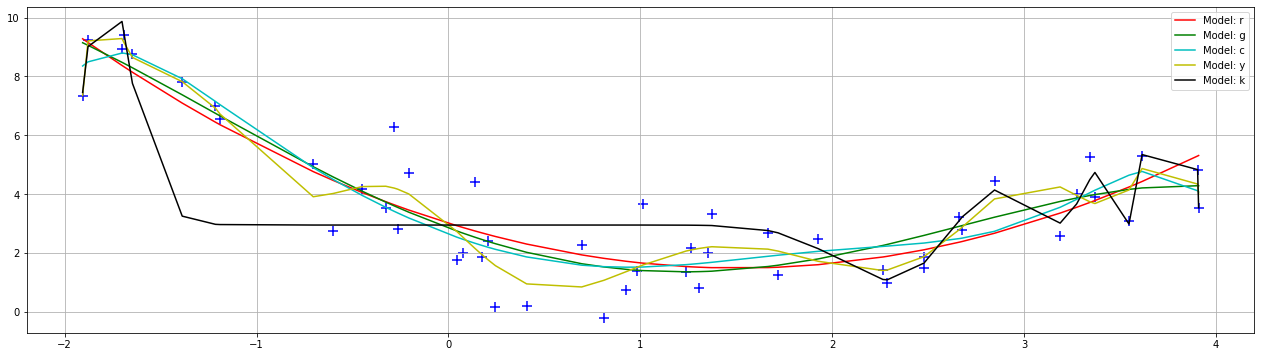

In [2]:
%run ../scripts/_nn_overfitting_sample.py

Šioje paskaitų serijoje nagrinėsime kaip sumažinti šią variaciją arba kaip sukurti ir apmokyt modelius kurie turi mažesnę variaciją ir nėra toks perdėtas. Šios technikos supaprastina modelius, bet svarbu nesupaprastinti per daug nes tokiu atveju modelis išvis nesugebės prisiderinti prie duomenų.
Mašininio mokymosi kontekste reguliavimas (reguliaricija) gali būti suprantamas kaip informacijos pridėjimo / tikslinės funkcijos keitimo procesas, siekiant išvengti per didelio modelio pritaikymo. Kalbant apie  tikslinės funkcijos keitimo procesą jeigu esate girdėję apie <code>**L2 normalizacija**</code> tipiškai ten yra paprastai yra apribojimas, kurį mes įtraukiame į kainos funkciją. Bendrai šnekant tai daro preventyvius pakeitimus pačiam mokymosi procesus.

### Dažniausios reguliarizacijos technikos

 - Ankstyvas sustabdymas (angl. early stopping)
 - L1/L2 reguliarizacija (
 - Akstyvas iškritimas (angl. dropout)

[Tradicinė reguliarizacijos](https://en.wikipedia.org/wiki/Regularization_(mathematics)) savoką reiškia informacijos pridėjimas siekiant išspręsti arba išvengti per didelio prisitaikymo ir sumažinti apibendrinimo klaidą.<br>

<code>**Aptarsime šias temas**</code>

- Apibendrinimo efektyvumo gerinimas
- Kaip vengti perteklinio pristaikymo su per daug duomenų ir duomenų augmentacija
- Tinklo pajėgumų mažinimas
- Norminių baudų pridėjimas prie kainos funkcijos: L1 ir L2 reguliarizacija
- Iškritimas

## Perteklinio prisiderinimo redukcijos technikos

Nors visos šios technikos (jų ko gero yra ir daugiau) yra praktiškos tačiau mes negalėsime jų visų apvželgti per šias paskaitas tačiau atliekant savo paties projektus būtų pravartu savarankiškai apžvelgti tai ko nepatarsime per paskaitas. Šis medis susideda iš šių pagridininių šakų:

 - Duomenų rinkinys (angl. dataset)
 - Architektūra (angl. architecture setup)
 - Normalization (angl. normalizacija)
 - Treniravimo ciklas (angl. training loop)
 - Reguliarizacija (ang. reguliarization)

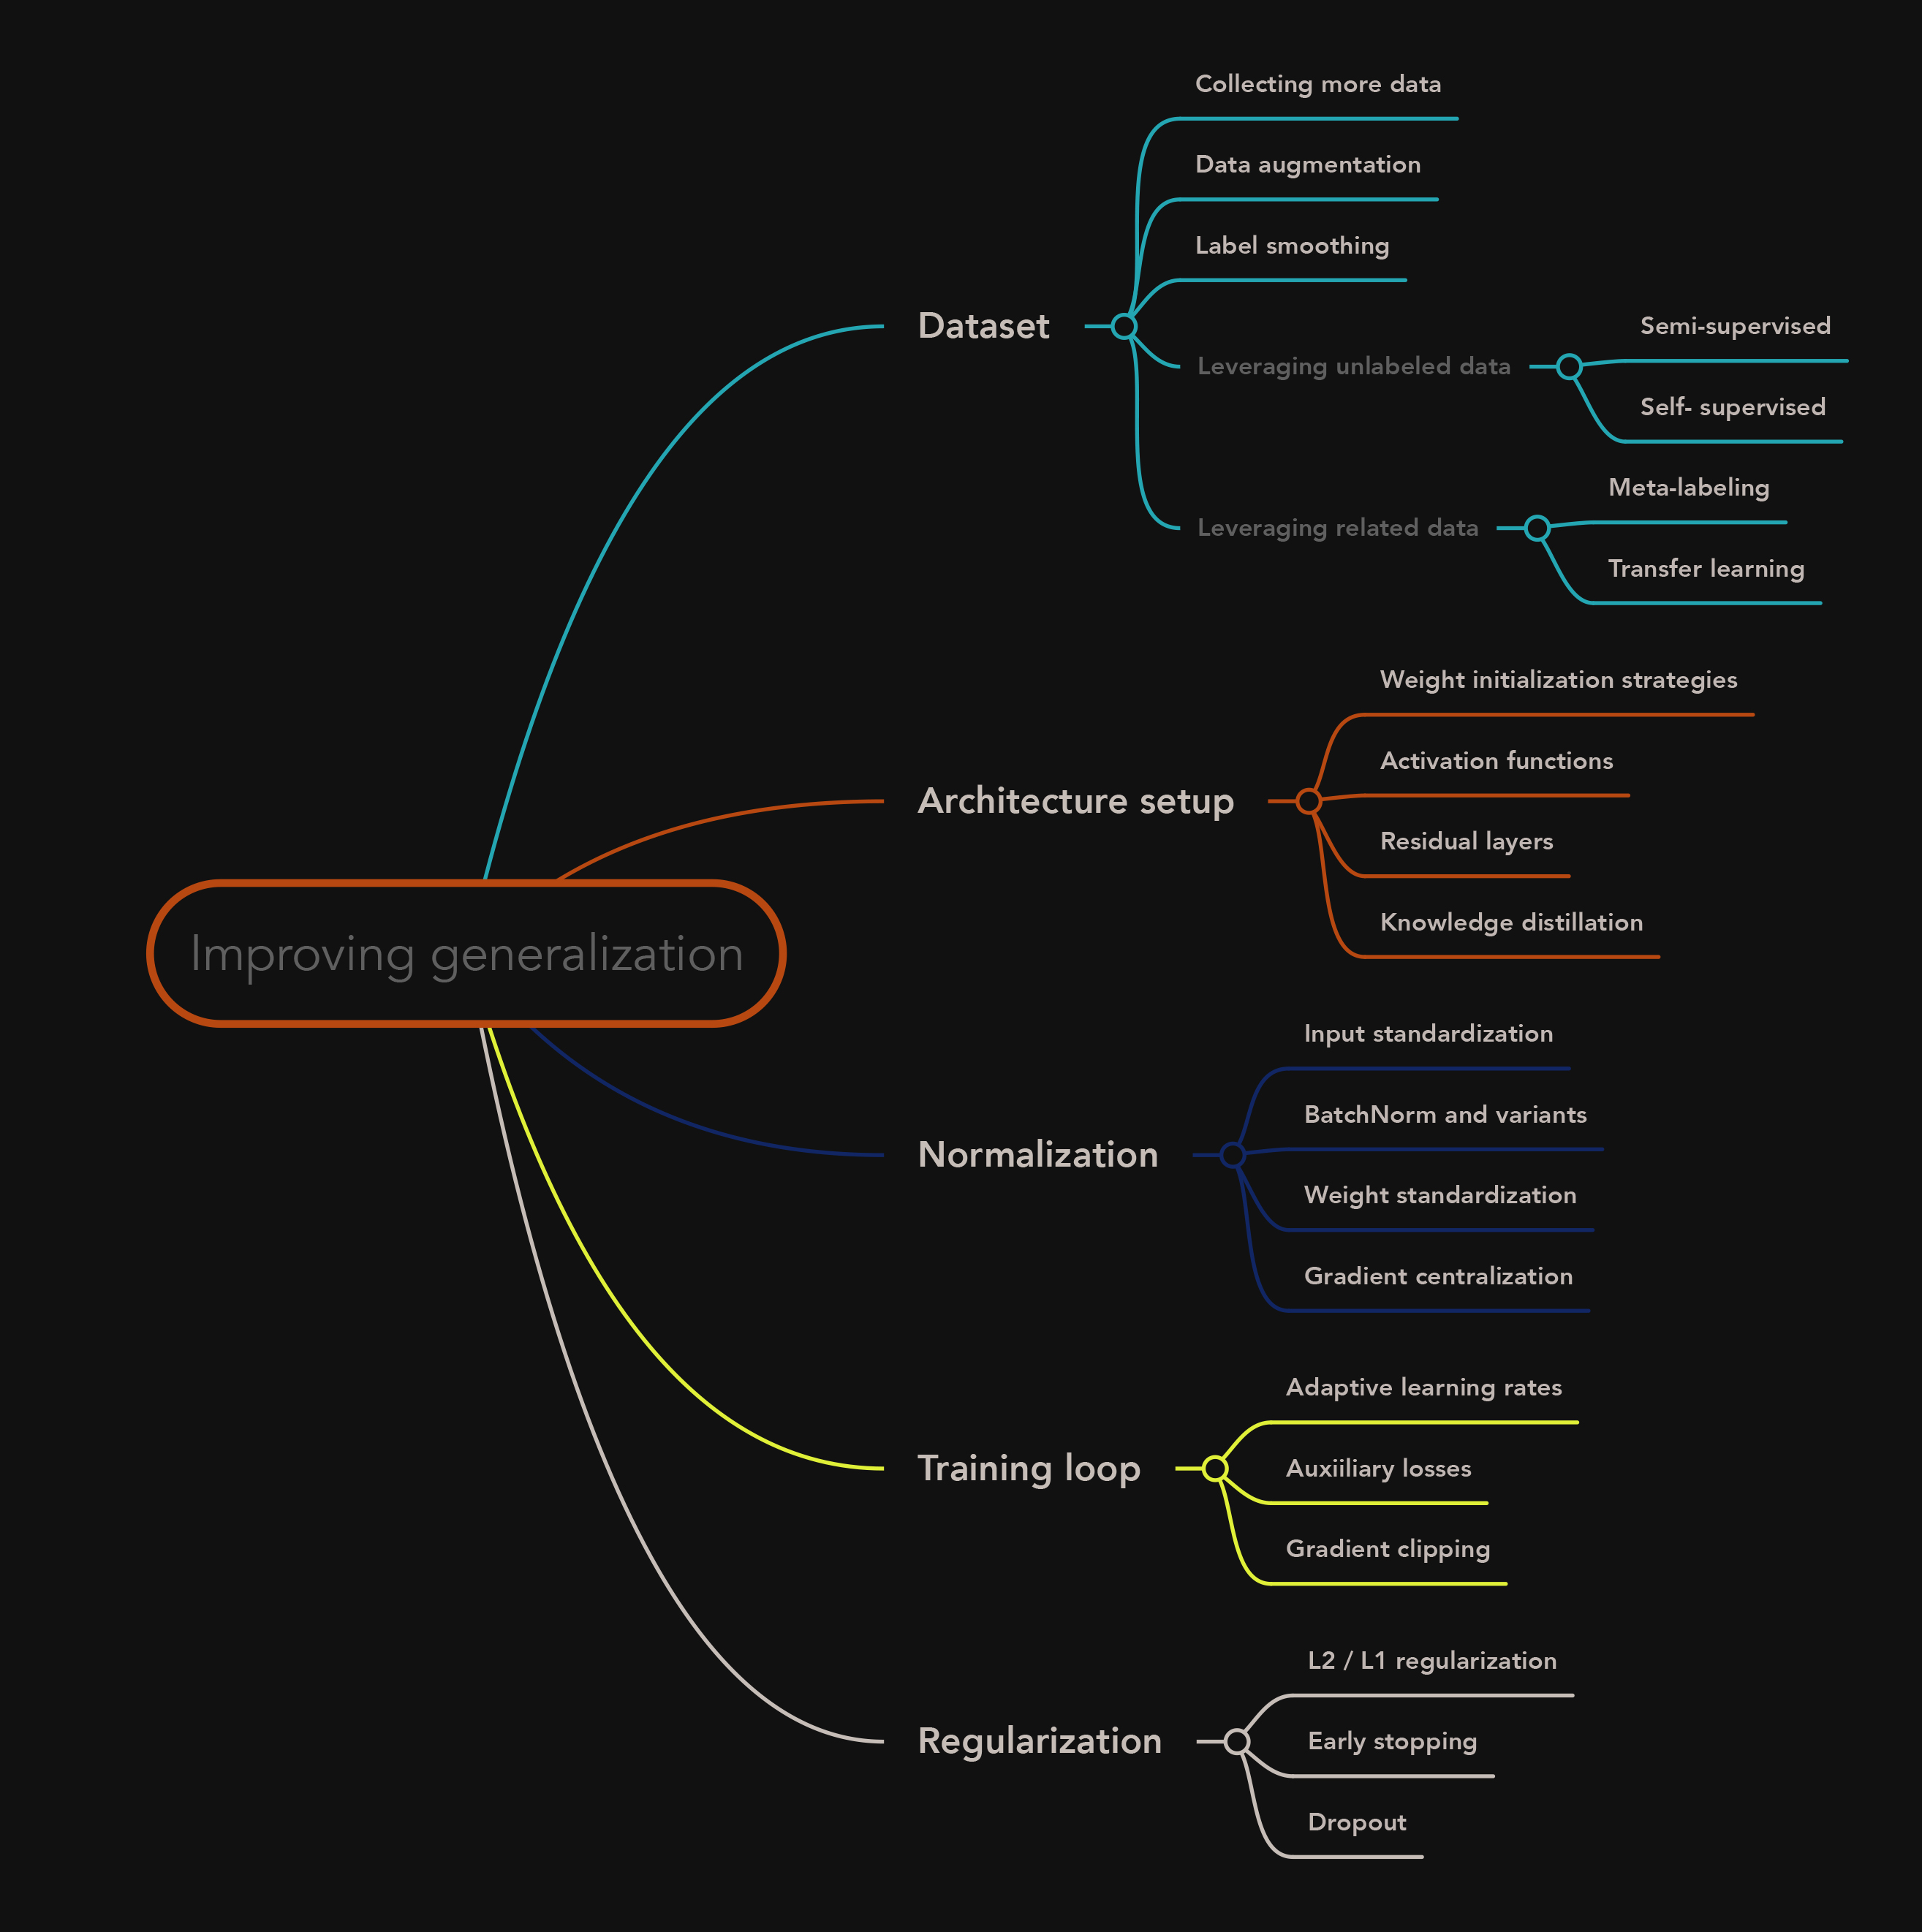

Kalbant apie <code>**duomenų rinkinio**</code>pogrupį geriausia strategija šioje kategorijoje siekiant pagerinti modelio rezultatus ko gero yra surinkti daugiau duomenų (jeigu tai yra įmanoma). Apvželgisme sepcialą metriką kuri leis įvertinti ar daugiau duomenų būtų naudinga modeliuo. Tuomet kai surinkti daugiau duomenų yra neįmanoma arba laiko prasme nepraktiška mums gali padėti duomenų augmentacija. Tai technika kuri modifikuoja įvesties savybes, pvz vaizdo atveju tai būtų įvairios rotacijos ir kt. deformacijos. Kita technika yra etikečių išlyginimas kad jūsų modelis būtų mažiau pasitikintis savimi, dažniausiai naudojama GAN (generative adversial network) kontekste. Principas kad vietoje tarkime dvejų etikečių kurių vertės yra 0 ir 1, naudojame reiškmes 0.1 ir 0.9. Kita technika pusiau prižiūrimas mokymas (angl. semi-supervised) yra naudojant nepažymėtus duomenis kuomet modelis yra treniruojamas su subaibę duomenų kurie yra sužymėti ir tuomet jeigu modelis yra užtikrintas kad gana gerai atlieka savo darbą galime panaudoti pati modelį sužymėti kitus nežymėtus duomenys ir taip padidinti savo duomenų rinkinį. Visiškai savarankiško mokymosi (angl. self-supervised) atveju sukuriame taip vadinamas (pretext) užduotį kurios veikimo principas yra padalinus tarkime vaizdą į atskirus elementus apmokyti modelį nustatyti teisinga šių dalių eiliškumą. Tačiau abi pastoriosios technikos yra už šių paskaitų ribų dėl savo komplesiškumo. Tai pat yra susijusių duomenų panaudojimo technika. Naudojame skirtingus mažus duomenų rinkinius ir modelis išmoksta išmokti (angl. meta-learning). Pernešamis mokymasis (angl. transfer learning) yra technika kuomet modelis yra apmokas su dideliu duomeų rinkinių kuris yra gimingas tačiau naudojamas kitiems tikslas, tarkime rengeno nuotraukų atveju duomenų rinkinys gali būti susijęs su kokios nors pulmonologinėmis ligomis ir taip modelis apmokytas idetifikuotą vieną iš tų ligų gali būti permokytas (pereguliuotas) su gerokai mažesniu duomenų rinkiniu idetifikuoti tarkime covid-19.

Pogrupis <code>**architektūros sąranka**</code> susijusi su tuo kaip mes nustatome savo NN struktūros elementus. Mes kalbėsime apie svorių inicializavimo strategijas, kaip pasirinkti aktivacijos funkcijas, liekamieji sluoksniai (angl. residual layers) tai yra jungčių tarp neuronų praleidimas, tai galime kartais praleisti ir visą sluoksnį ir tai padeda išvengti nykstančių ir sprogstančių gradientų. Žinių distiliavimas tai kai treniruojame didelį neuronį tinklą (vadinami ji mokytoju) ir turime mažesnį neuroninį tinklą (studentas) ir pastarasis mokosi prognozuoti remiantis mokytojo prognozėmis. 

<code>**Normalizacijos**</code> pogrupis mes šiek tiek kalbėjomės apie įvesties standartizacija, aptarsime tai plačiau priėję prie duomenų augmentacijos temos. Tai pat yra technikų rinkinys susijęs su <code>**BatchNorm**</code> paketo normalizcaija tai susiję su įvesties standatizacija bet tai yra intenalu pačiame tinkle. Todėl užuot dirbe tik su pačia įvestimi į tinklą mes turime dirbti su įvestimi į paslėptus sluoksnius, su paslėpto sluoksnio aktivacijų normalizacija. Šį technika turi pogrupius <code>**GroupNorm, InstanceNorm, LayerNorm**</code> kurios bus nagrinėjos šiame kurse. Svorių standartizacija tai pat yra viena iš techniku šiek tiek susijusi su svorių inicializacija. Tai pat gradiento centralizacija technika kuri yra panašį į įvesties standartizacija išskyrus tai kad normalizuojame gradientus taip kad jų vidurkis yra 0 ir vieneto dispersija (variacija). 

Modifikacijos atliekamaos <code>**treniravimo cikle**</code> apima optimizacijos (optimizatoriaus) parinkimą kuris yra nepaminėtas grafike, tai pat adaptyvu mokymosi žingsnį (greitį) kurie yra labai veiksminga ir praktiška technika, tai pat pagalbiniai nuostoliai (angl. auxiliary losses) kaip papildomos kainos funkcijos tarpinuose sluoksniuose kurias kombinuojame ir tai padeda treniruoti tinklą, pavyzdiui [inception network](https://arxiv.org/pdf/1409.4842.pdf) modelis. Mes nagrinėsime šį modelį konvoliucinių neuroninių tinklų temoje. Tai pat yra gradiento kirpimo technika kuri padeda išvengti labai didelių gradientų, jiems tampa labai dideliais mes galime juos nukirpti duodami maksimalią vertę.

<code>**Reguliarizacijos**</code> pogrupis apima L1/L2 normines baudas dideliems svoriams kas užtikrina kad tinklas turi mažus svorius ir tai pat sumažina tinklo jautrimą konkrečioms įvestims tai generuoja mažiau triukšmingas prognozes tai sumažiname variaciją. Aptarsime ankstyvo sustavdymo technika stebėdami validacijos rinkinio rezultatus ir iškritimą kas yra atsitiktinių neuronų išmetimas kas yra kaip būdas pridėti triukšmo tinklui ir tai padeda vengiant perteklinio prisiderinimo (angl. overfitting).

## Duomenų augmentacija

Vienas geriausiu būdų pagerinti modelio rezultatus yra tiesiog susikaupti į patį duomenų rinkinį prieš pradedant NN tiklo taikymą. Tai yra surinkti daugiau duomenų ir arba turimus duomenys augmentuoti. Tačiau kaip žinoti ar daugiau duomenus duos naudos modelio efektyvumui ? Yra tokia technika kuris vadinasi (angl. learning curves) mokymosi kreives.  

### Daugiau duomenų

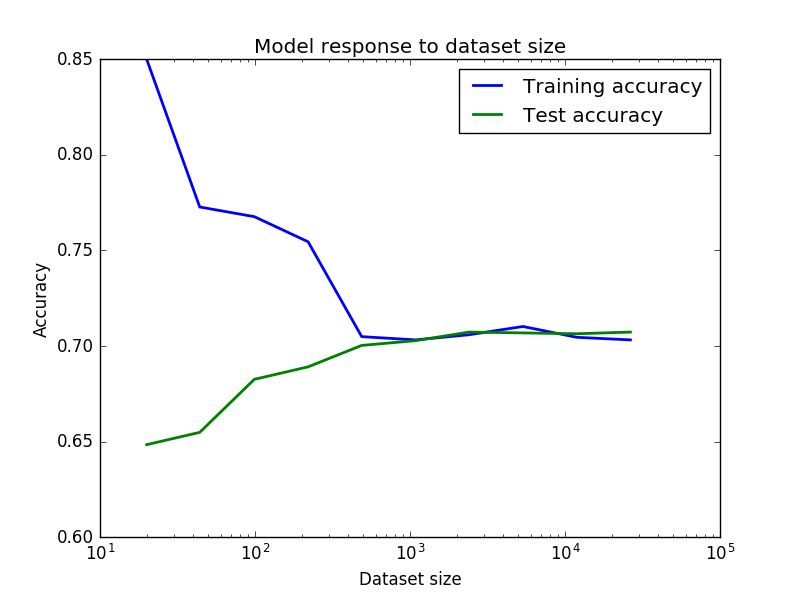

Čia softmax klasifikatoriaus pavyzdys kuris naudoja subaibė iš MNIST duomenų rinkinio, bet tai gali būti padaryti su bet kokių NN ir tai padės išsiaiškinti ar daugia duomenų yra naudinga modelio rezultatamas. Tai ka mes čia matome ant x ašies yra skirtingo dydžio duomenų rinkiniai nuo 100 > iki < 10 000 pavyzdžių modelio treniravimui, tuo tarpu testavimo duomenų rinkinys buvo visada buvo 1/5 viso duomenų rinkinio. Iš kreivės matome kad pridėjus daugiau duomenų modelis tikslumo rezultatai prastėja kad nėra visai intuityvu. Jeigu turime labai maža duomenų rinkinį tada labai lengva padaryti perteklinį modelio prisiderinimą prie mažo duomenų rininkinio, todėl esant mažam rinkinui modelio tikslumas treniravimo fazejė bus visada aukštas. Tačiau kas daug svarbiau yra tai kad modelio rezultatai su testiniais duomenimis gerėja, to mes ir siekiame nes tai yra svarbiausia. Mes nežinome kas bus kuomet turėsime duomenų rinkinį kuris yra > 100 000. Galime manyti kad rezultatai gerės arba nustos gerėti nepaisant kiek duagiau turėsime duomenų ir tai yra spekuliacijos bet šiem saprotavimas reikia pasidaryti mokymosi kreives.

### Augmentacija

Tai jau turimų duomenų modifikacija. Šiuo atveju mes turime MNIST duomenų rinkinį. Viršuje yra duomenų rinkinio pavyzdžiai, o apačioje atsitiktinai augmentuotos/modofikuotos pastarųjų pavyzdžių versijos. Jie šiek tiek pristraukti (ang. zoomed in) ir šiek tiek paversti (ang. rotated). Kam mums to reikia ? Tai gali padėti tinklui išvegti to kad jis prisimena tiklslias pikselių lokacijas, esant tokiem augmentuotiems pavyzdžiams tinklas turėsi išmokti daugiau nei šios lokacijos, išmokti formas arba pagrindinių formų lokacijas ir ryšį tarp jų. Duomenų augmentacija yra pigus (laiko sanaudų prasme) būdas padėti tinklui pasiekti geresnių generalizacijos (apibendrinimo) rezultatų. Daugiau informacijos apie čia augmentacijos operacijas rasite [čia](https://pytorch.org/vision/stable/transforms.html).

Mes anksčiau aptarėme [duomenų krautuvus](./code/dataloader/__I_dataloader_expl.ipynb), kuomet naudojome savo duomenų rinkinį ir naudojome paprastą transformacija `totensor = transforms.Compose([transforms.ToTensor()])` kuri tiesiog konvertavo paveikslėlį į į pytorch tensorių. Žemiau esančiame kodo pavyzdyje naudojame šiek išmanesnę transformaciją `training_transforms` ir `test_transforms`

In [ ]:
import PIL
import torch
import random
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import datasets
from torch.utils.data import DataLoader

Naudojame papildoma biblioteką <code>**torchvision**</code> kuri yra sudiegiama kartu su PyTorch. Šiuo atveju pasinaudosime `transforms` submodulio klase `Compose` kuri leidžia mums sukabinti daugybe skirtingų transformacijų. 
 - Resize
 - RandomCrop
 - RandomRotation
 - ToTensor
 - Normalize
 
<code>**Resize**</code> (pakeisti dydį) kadangi MNIST paveikslėlių pavyzdžiai yra 28x28, mes keičiame jų dydį į 32x32, tada vėl juos atsitiktinai apkerpame <code>**RandomCrop**</code> taip kad dydis būtų 28x28. Iš principo operacija gaunasi tokia kad priartiname ir atsitiktinai apkerpame tą padidintą paveikslėlį. Taip padaroma transliacijos operacija. Tuomet atliekama <code>**RandomRotation**</code> atsitiktinis pasukimas nuo -30º iki 30º, kartais tai bus didelis kartais mažas kampas. Galiausiai atliekame konversija į pytorch tensorių <code>**ToTensor**</code> kuri pagal nutylėjimą normalizuos duomenys taip kad jie yra skalėje nuo 0 iki 1. Tačiau gradientinio nusileidimo algortimuo geriau būtų kad normalizuotume duomenys į standartinę normaliają distribuciją (vidurkis yra 0, o standartinis nuokrypis yra 1). Todėl naudojame <code>**Normalize**</code> transformacija kurioje galime pasirinkti vidurkį ir standartinį nuokrypį. Kadangi visi mūsų duomenys yra pikseliai kurių reikšmių variacija yra nuo 0 iki 255, po <code>**ToTensor**</code> operacijos normalizavus reikmės bus 0 iki 1, todėl galime <code>**Normalize**</code> funkcijoje pasirinkti parametrus `mean=0.5` kaip vidurkį ir `std=0.5`  standrtinį nuokrypį ir tada mūsų duomenys po normalizacijos bus skalėje nuo -1 iki 1.

\begin{multline*}
x_{j}’ = \dfrac{x_{j} - \mu_{j}}{\sigma{j}}
\end{multline*}

\begin{multline*}
x_{j}’ = \dfrac{1 - 0.5}{0.5} = 1
\end{multline*}

\begin{multline*}
x_{j}’ = \dfrac{0 - 0.5}{0.5} = -1
\end{multline*}

In [ ]:
training_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.RandomCrop(size=(28, 28)),
    torchvision.transforms.RandomRotation(degrees=30, interpolation=PIL.Image.BILINEAR),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

Testiniame duomenų rinkinyje mes nenorime jokių atsitiktinimų todėl šio rinkinio transformacijoje nėra šių operacijų. Tačiau kadangi naudojome dydžio keitimą ir apkrirpimą treniravimo duomenų rinkinyje tą patį turime padaryti ir testinių duomenų rinkinyje dėl nuoseklumo nes kitaip testinių duomenų atvaizdai bus mažesni nei treniravimo duomenys. Naudojame <code>**Resize**</code> ir <code>**CenterCrop**</code> metodus, pastarasis apkerpą duomenys iš centro nuo kraštų vienodai.

In [ ]:
test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.CenterCrop(size=(28, 28)),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

In [ ]:
train_dataset = datasets.MNIST(root='data', train=True,  transform=training_transforms, download=True)
test_dataset  = datasets.MNIST(root='data', train=False, transform=test_transforms)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(dataset= test_dataset,  batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(images[i].view(28, 28).numpy(), cmap='binary')
    
plt.tight_layout()

In [ ]:
train_dataset = datasets.MNIST(root='data', train=True, transform=torchvision.transforms.ToTensor(),download=True)
train_loader  = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(images[i].view(28, 28).numpy(), cmap='binary')
    
plt.tight_layout()

## Ankstyvas sustabdymas

## L2 reguliarizacija neuroniniams tinklams


Pridėkime baudos terminą už komplesiškumą.Šias normines baudas galime pridėti prie kainos funkcijos. Yra dvi dažniausios šių norminių baudų versijos tai <code>**L1**</code> ir <code>**L2**</code>. Tarkime daugiasluoksnių perceptrone turime 2 įvesties vienetus įvesties sluoksnije, paslėptame sluoksnyje 3 įvesties ir 2 išvesties vienetus. Viskas yra pilnai sujungta. Jeigu jei turime tokią struktūra ir tarkime vienas iš įvesties sluoksnio vienetu turi labai didelę svorio (w1) reikšmę palyginus su kitais svoriais. Todėl šis svoris turės ir didelę įtaką pačiam NN nors jis reprezentuoją tik vieną savybę, ir jeigu turime daug įvesčių kas gali atistikti tai šis vienas svorį persvers visas kitas savybių įvestis. Tai gali sukelti modelyje daug triukšmo arba variacijų, tinklas gali pasidaryti jautrus mažiems įvesties pokyčiams. Todėp pridėdami baudos veiksnius prieš didelius svorius užtikriname kad jie būtų maži ir labiau uniformalus, panašesni vienas į kitą ir tai veikia preventyviai prieš tinklo fluktuacijas.

 - L1 reguliarizacija (LASSO regression)
 - L2 reguliarizacija (Ridge regression, a.k.a Thikonov reguliarization)
 
 Iš esmės tai svorio sumažinimas arba bauda už sudėtingumą. <br>
 
<code>**L² reguliarizacija tiesiniams modeliams (logistinė, tiesinė regresija regresija)**</code><br>

\begin{multline*}
\mbox{kaina}_{\ w, b} = \dfrac{1}{n}\sum^{n}_{i=1} \mathcal{L}(y^{[i]}, \hat{y}^{[i]})
\end{multline*}

<code>**L² reguliarizacija (𝜆 yra hyperparametras)**</code><br>
\begin{multline*}
\mbox{kaina}_{\ w, b} = \dfrac{1}{n}\sum^{n}_{i=1} \mathcal{L}(y^{[i]}, \hat{y}^{[i]}) + \dfrac{\lambda}{n}\sum_{j} \ w^{2}_{j}
\end{multline*}

\begin{multline*}
\sum_{j} \ w^{2}_{j} = ||w||^{2}_{2}
\end{multline*}

\begin{multline*}
\mathcal{L} - \mbox{loss is binary cross entropy}
\end{multline*}

Šis naujas terminas: 
\begin{multline*}
\dfrac{\lambda}{n}\sum_{j} \ w^{2}_{j}
\end{multline*}

Tai iš esmės yra kvadratinių svorių (pakeltą ² kad neturėtume neigiamų reikšmių) suma. Tai reiškia kad kuo didesni svoriai tuo didesnė šį reguliarizuota kaina bus. 𝜆/n yra kaip normalizacijos terminas , o 𝜆 yra reguliaricjos stiprumo hyperparametras kurį reikia pasirinkti, kuo didenė jos reikšmė to stipresnė reguliarizacija. Paprastai naudojama maža reikšmė kaip ~ 0.01<br>

<code>**L1 reguliarizcijos išraiška labai panaši tik vietoje kvadarinės svorių sumos bus absoliuti svorių suma)**</code>

<code>**L² reguliarizacija daugiasluoksniams neuroniniams tinklams**</code><br>

NN sandaroje turime ne svorių vektorių, o matrica. Pasinaudosime Frobenius norm vietoje vektoriaus elementų sumos atliksime matricos eilučių ir kolonų sumavimą.
Žemiau esančiame pavyzdyje, taikysime šį metodą vienai svorių matricai sluoksnyje 𝑙, žinoma turime daugybę svorių sluoksnių, todėl galime turėti kiekvienam sluoksniui skirtinga 𝜆 arba visiems tą pačią, tai priklauso ar norime reguliarizuoti visus sluoksnius.

\begin{multline*}
\mbox{kaina}_{\ w, b} = \dfrac{1}{n}\sum^{n}_{i=1} \mathcal{L}(y^{[i]}, \hat{y}^{[i]}) + \dfrac{\lambda}{n}\sum^{L}_{l=1} \ || \mathbf{w}^{(l)}||^{2}_{F}
\end{multline*}

<code>**Frobenius norm (squared)**</code><br>

\begin{multline*}
|| \mathbf{w}^{(l)}||^{2}_{F} = \sum_{i} \sum_{j} (w^{(l)}_{i, j})^{2}
\end{multline*}

Kadangi modifikavome kainos funkcija, tai ir atliekant treniravimą naudojant gradientinio nusileidimo algoritmą atliksime gana paprastas algoritmo modifikacijas.
Išsvedami kainos funkcijos išvestinę atsižvelgiant į svorius mes tiesiog pridėsime reguliarizacijos termino (išvestinę).

\begin{multline*}
w_{i, j} := w_{i, j} - \alpha \dfrac{\partial \mathcal{L}}{\partial w_{i, j}}
\end{multline*}

\begin{multline*}
w_{i, j} := w_{i, j} - \alpha ( \dfrac{\partial \mathcal{L}}{\partial w_{i, j}} + \dfrac{2\lambda}{n}w_{i, j} )
\end{multline*}

Reguliarizacijos implentacija PyTorch yra labai paprasta. Mes galime iteruoti per inicializuotus modelio parametrus nadaudami `named_parameters` funkcija, kuri gražina parametrų pavadinimus ir reikšmes. Tada mes filtruojama taip kad būtų imami tik svoriai, ne poslinkiai ir paskiau atliekame reguliarizacijos operacija, pirma akumuliuodami visas kvadratines svorių reikšmes ir galiausiai pridedame prie kainos funkcijos. Tai atliekama treniravimo cikle.

In [ ]:
L2 = 0.
for name, p in model.named_parameters():
    if 'weight' in name:
        L2 = L2 + (p**2).sum()
    
cost = cost + 2./targets.size(0) + LAMBDA + L2
optmizer.zero_grad()
cost.backward()

Yra dar lengvesnis budas, tiesiog pasinaudojant `torc.optim.SGD` argumentais, `lr` ir `weight_decay` ir pytorch atliks L2 reguliarizacija už mus.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay = LAMBDA)

for epoch in range(num_epochs):
    out = model(X_train_tensor)
    cost = F.binary_cross_entropy(out, y_train_tensor)
    optimizer.zero_grad()
    cost.backward()

## Iškritimo koncepcija

## Iškritimo adaptacijos interpretacija

## Įvesties normalizacija

## Paketo normalizacija

## Svorių inicializacija

## Xavier Glorot and Kaiming He inicializacija

## Svorių inicializacija PyTorch